In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

In [2]:
bom_movie_gross_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\dsc-phase-1-project-v2-4\UnzippedData\bom.movie_gross.csv')
rt_movie_info_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\dsc-phase-1-project-v2-4\UnzippedData\rt.movie_info.tsv', sep='\t')
rt_reviews_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\dsc-phase-1-project-v2-4\UnzippedData\rt.reviews.tsv', sep='\t', encoding = 'unicode_escape')
tmbd_movies_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\dsc-phase-1-project-v2-4\UnzippedData\tmdb.movies.csv')
tn_movie_budgets_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\dsc-phase-1-project-v2-4\UnzippedData\tn.movie_budgets.csv')

In [3]:
bom_movie_gross_df.head()#calling top 5 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [6]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [8]:
rt_movie_info_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [9]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [11]:
rt_reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [12]:
#sorting values of popularity 

In [13]:
tmbd_movies_df = tmbd_movies_df.sort_values(['popularity'], ascending=False)

In [15]:
tmbd_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 23811 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.2+ MB


In [16]:
tmbd_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [17]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
tn_movie_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [166]:
tn_movie_budgets_df.sort_values(by='worldwide_gross', ascending=False).head(5)#sorting by descending worldwide gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec,Avatar,425000000,760507625,2776345279
42,43,Dec,Titanic,200000000,659363944,2208208395
5,6,Dec,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,Apr,Avengers: Infinity War,300000000,678815482,2048134200
33,34,Jun,Jurassic World,215000000,652270625,1648854864


In [21]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',', '')#replacing commas with nothing

In [22]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('$', '')#replacing$ with nothing

In [23]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',', '')#replacing commas with nothing

In [24]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('$', '')#replacing$ with nothing

In [25]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',', '')#replacing commas with nothing

In [26]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('$', '')# replacing $ with nothing

In [27]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].astype('int64')# changing worldwide gross to int

In [28]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].astype('int')#changing production budget to int

In [29]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace('\d+', '') #removing special chars from release date

In [30]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(',', '')#removing commas from release date

In [31]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(' ', '')#removing empty space from release date

In [32]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].astype('str')#changing release date to string type

In [33]:
tn_movie_budgets_df.drop(tn_movie_budgets_df[tn_movie_budgets_df['worldwide_gross'] == 0].index, inplace = True)

In [145]:
tn_movie_gross_head = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=False).head(10)#sorting values of worldwide gross by descending

Text(0.5, 1.0, 'Movie Vs Worldwide Gross (Top Ten)')

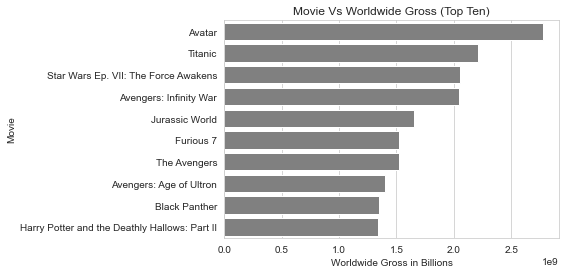

In [165]:
#graphing top ten worldwide gross

sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_head, color = 'Grey')

plt.xlabel('Worldwide Gross in Billions')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross (Top Ten)')

Text(0.5, 1.0, 'Movie Vs Production Budget (Top Ten)')

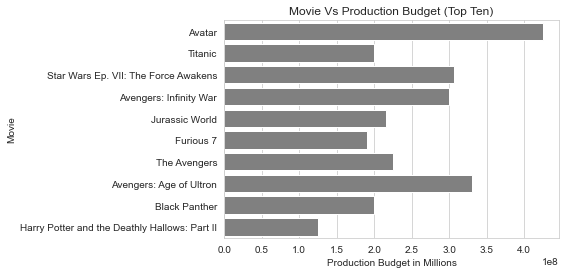

In [164]:
#making barplot for production budget of top ten gross

sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_head, color = 'Grey')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Top Ten)')

In [154]:
tn_movie_gross_tail = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=True).head(10)#sorting values of worldwide gross by ascending

Text(0.5, 1.0, 'Movie Vs Worldwide Gross (Bottom Ten)')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


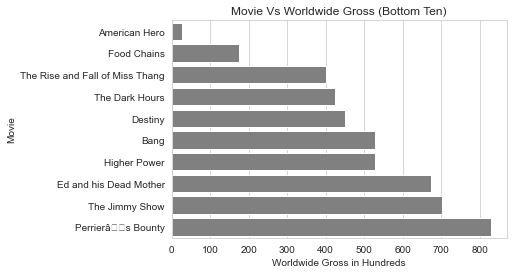

In [163]:
#graphing bottom ten worldwide gross

sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_tail, color = 'Grey')

plt.xlabel('Worldwide Gross in Hundreds')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross (Bottom Ten)')

Text(0.5, 1.0, 'Movie Vs Production Budget (Bottom Ten)')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


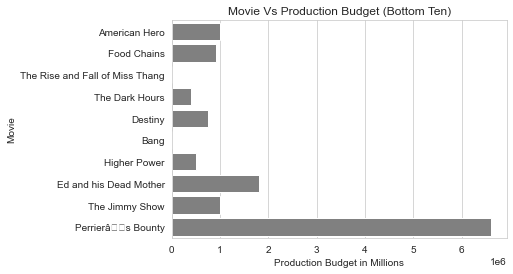

In [162]:
#making barplot for production budget of bottom ten gross

sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_tail, color = 'Grey')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Bottom Ten)')

In [35]:
tn_movie_budgets_df.info()# no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5415 non-null   int64 
 1   release_date       5415 non-null   object
 2   movie              5415 non-null   object
 3   production_budget  5415 non-null   int32 
 4   domestic_gross     5415 non-null   object
 5   worldwide_gross    5415 non-null   int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 275.0+ KB


Text(0.5, 1.0, 'Takes money to make money')

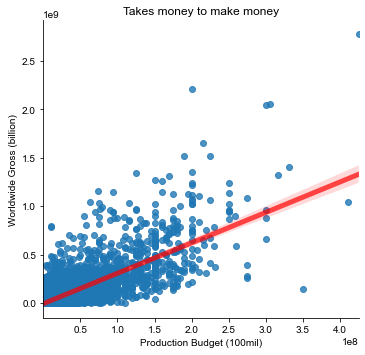

In [36]:
sns.lmplot(data=tn_movie_budgets_df, x='production_budget', y='worldwide_gross', line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set_style('whitegrid')


plt.xlabel("Production Budget (100mil)")
plt.ylabel("Worldwide Gross (billion)")
plt.title('Takes money to make money')
#Relation between money put in and money gotten out

In [37]:
release_date_group = tn_movie_budgets_df.groupby('release_date')#creating group of release date(month)

In [38]:
month_group_world = release_date_group.sum(['worldwide_gross'])#finding sum of worldwide gross in release date(month)

In [39]:
monthly_gross_avg = tn_movie_budgets_df.groupby('release_date')['worldwide_gross'].mean().astype('int64')#finding average of worldwide gross from releasedate group, setting to integer type

In [40]:
month_group_world['month_gross_avg'] = monthly_gross_avg.astype('int64')#setting month_group_world ti integer

In [41]:
month_group_world.reset_index(inplace=True)#resettting index of month group world

In [42]:
month_group_world.dtypes

release_date          object
id                     int64
production_budget    float64
worldwide_gross        int64
month_gross_avg        int64
dtype: object

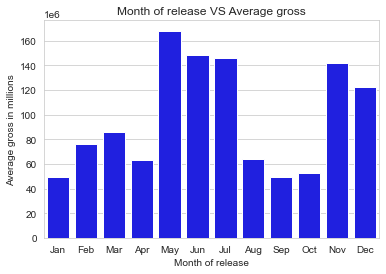

In [124]:
sns.barplot(x = 'release_date',
            y = 'month_gross_avg',
            data = month_group_world,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Average gross in millions')
plt.title('Month of release VS Average gross')
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
#graphing average gross vs month of release

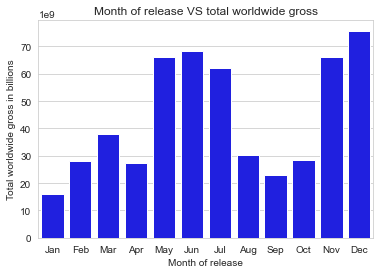

In [125]:
sns.barplot(x = 'release_date',
            y = 'worldwide_gross',
            data = month_group_world,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Total worldwide gross in billions')
plt.title('Month of release VS total worldwide gross')
plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))
#graphing total worldwide gross vs month of release

In [45]:
#importing SQL db

In [46]:
conn = sql.connect("im.db")

In [47]:
type(conn)

sqlite3.Connection

In [48]:
cur = conn.cursor()

In [49]:
pd.read_sql_query("SELECT * from sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,movie_budgets,movie_budgets,41369,"CREATE TABLE movie_budgets(\n ""id"" TEXT,\n ""..."
9,table,tmdb_movies,tmdb_movies,41574,"CREATE TABLE tmdb_movies(\n """" TEXT,\n ""genr..."


In [50]:
#query of the average number of votes from SQL db movie_ratings
avg_votes = pd.read_sql("""
SELECT avg(numvotes)
FROM movie_ratings
""", conn)

In [51]:
#query of average ratings above 9 for writers
query1 = pd.read_sql("""
SELECT DISTINCT averagerating, primary_name, numvotes
FROM movie_ratings
INNER JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
INNER JOIN writers
    ON movie_basics.movie_id = writers.movie_id
INNER JOIN persons
    ON writers.person_id = persons.person_id
WHERE death_year is null AND numvotes > 3500 AND averagerating >= 9.0
""", conn)

In [52]:
query1.sort_values('averagerating', ascending=False)#sorting by top average writers

,averagerating,primary_name,numvotes
17,9.7,Quentin Tarantino,5600
10,9.5,Saman Weeraman,6509
1,9.4,Anjana Krishnakumar,9629
0,9.4,Ram,9629
4,9.3,Syed Gaosul Alam Shaon,18470
5,9.3,Anam Biswas,18470
6,9.3,Adnan Adib Khan,18470
3,9.3,Alper Caglar,100568
16,9.3,Donavon Warren,17308
7,9.2,Mahesh Manjrekar,4297


In [53]:
grouped_writers = query1.groupby('primary_name')#grouping writers by name
writer_avg_rating = grouped_writers.mean('averagerating')# finding average rating of writers
writer_avg_rating = writer_avg_rating.reset_index()#reseting index

In [54]:
writer_avg_rating.sort_values(by=['averagerating'], ascending=False)#sorting avverage rating writers by avgrating

,primary_name,averagerating,numvotes
13,Quentin Tarantino,9.7,5600
16,Saman Weeraman,9.5,6509
4,Anjana Krishnakumar,9.4,9629
14,Ram,9.4,9629
17,Syed Gaosul Alam Shaon,9.3,18470
2,Alper Caglar,9.3,100568
3,Anam Biswas,9.3,18470
7,Donavon Warren,9.3,17308
1,Adnan Adib Khan,9.3,18470
10,Mahesh Manjrekar,9.2,4297


In [56]:
#query movies/genre/writer with their average rating ahving more than 3500 votes
genre_query = pd.read_sql("""
SELECT DISTINCT averagerating, primary_name, genres, original_title, movie_basics.movie_id
FROM movie_ratings
INNER JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
INNER JOIN writers
    ON movie_basics.movie_id = writers.movie_id
INNER JOIN persons
    ON writers.person_id = persons.person_id
WHERE death_year is null AND numvotes > 3500
""", conn)

In [57]:
genre_query.sort_values('averagerating', ascending=False).head(50)#sorting genre query by average rating descending

,averagerating,primary_name,genres,original_title,movie_id
8810,9.7,Quentin Tarantino,"Comedy,Drama",Once Upon a Time ... in Hollywood,tt7131622
1935,9.5,Saman Weeraman,"Drama,History",Aloko Udapadi,tt5963218
888,9.4,Anjana Krishnakumar,Drama,Peranbu,tt7738784
887,9.4,Ram,Drama,Peranbu,tt7738784
1678,9.3,Syed Gaosul Alam Shaon,"Crime,Mystery,Thriller",Aynabaji,tt5354160
6934,9.3,Donavon Warren,Drama,Wheels,tt2170667
1616,9.3,Alper Caglar,"Action,Drama,War",Dag II,tt5813916
1679,9.3,Anam Biswas,"Crime,Mystery,Thriller",Aynabaji,tt5354160
1680,9.3,Adnan Adib Khan,"Crime,Mystery,Thriller",Aynabaji,tt5354160
5336,9.2,Cem Yilmaz,"Comedy,Documentary",CM101MMXI Fundamentals,tt2592910


In [58]:
genre_query['genres'] = genre_query['genres'].str.replace('Sci-Fi', 'Sci_Fi')#changing sci-fi to sci_fi

In [59]:
grouped_genre = genre_query.groupby('genres')#grouping genres
genre_avg_rating = grouped_genre.mean('averagerating')#getting mean of average rating
genre_avg_rating = genre_avg_rating.reset_index()#resetting index of groouped genre


In [60]:
genre_avg_rating.sort_values(by = 'averagerating', ascending = False).head(10)#top ten average ratings by genre

,genres,averagerating
157,"Biography,Documentary,Drama",8.700000
149,Biography,8.600000
314,"Drama,Romance,Sport",8.500000
148,"Animation,History",8.300000
261,"Documentary,Family",8.300000
263,"Documentary,History,Music",8.300000
266,"Documentary,News",8.300000
103,"Adventure,Documentary,Drama",8.200000
272,"Drama,Family,Musical",8.200000
201,"Comedy,Drama,Thriller",8.166667


In [61]:
#  seperating genres comma list 

In [62]:
genres_expanded = genre_query['genres'].str.split(',', expand=True)
genres_expanded.columns = ['Genres'+str(i) for i in genres_expanded.columns]

In [63]:
# concat back to dataframe

In [64]:
genres_expanded_concat = pd.concat([genre_query, genres_expanded], axis=1)

In [65]:
genres_expanded_concat

,averagerating,primary_name,genres,original_title,movie_id,Genres0,Genres1,Genres2
0,4.2,Renny Harlin,"Action,Adventure,Fantasy",The Legend of Hercules,tt1043726,Action,Adventure,Fantasy
1,4.2,Daniel Giat,"Action,Adventure,Fantasy",The Legend of Hercules,tt1043726,Action,Adventure,Fantasy
2,4.2,Sean Hood,"Action,Adventure,Fantasy",The Legend of Hercules,tt1043726,Action,Adventure,Fantasy
3,4.2,Giulio Steve,"Action,Adventure,Fantasy",The Legend of Hercules,tt1043726,Action,Adventure,Fantasy
4,5.1,David E. Talbert,Comedy,Baggage Claim,tt1171222,Comedy,None,None
...,...,...,...,...,...,...,...,...
10266,4.7,Bruce Schooley,"Documentary,History",Death of a Nation,tt8564902,Documentary,History,None
10267,3.7,Vivek Oberoi,"Biography,Drama",PM Narendra Modi,tt9558612,Biography,Drama,None
10268,3.7,Ssandeep Singh,"Biography,Drama",PM Narendra Modi,tt9558612,Biography,Drama,None
10269,3.7,Anirudh Chawla,"Biography,Drama",PM Narendra Modi,tt9558612,Biography,Drama,None


In [66]:
#creating new df with comma seperated genres as their own columns
genres_expanded_group = genres_expanded_concat.groupby(['Genres0', 'Genres1', 'Genres2'])
genre_avg_rating = genres_expanded_group.mean('averagerating')
genre_avg_rating = genre_avg_rating.reset_index()

In [67]:
genre_avg_rating.sort_values(by = 'averagerating', ascending = False).head(10)#sorting top ten averageratings by descending

,Genres0,Genres1,Genres2,averagerating
131,Biography,Documentary,Drama,8.700000
252,Drama,Romance,Sport,8.500000
212,Documentary,History,Music,8.300000
89,Adventure,Documentary,Drama,8.200000
216,Drama,Family,Musical,8.200000
169,Comedy,Drama,Thriller,8.166667
122,Animation,Drama,Romance,8.114286
136,Biography,Documentary,News,8.100000
134,Biography,Documentary,Music,8.087500
137,Biography,Documentary,Sport,8.075000


In [68]:
melted_genre = genre_avg_rating.melt(var_name='index', value_name='')# changing df to long

In [69]:
melted_genre

,index,
0,Genres0,Action
1,Genres0,Action
2,Genres0,Action
3,Genres0,Action
4,Genres0,Action
...,...,...
1103,averagerating,5.9
1104,averagerating,6.8
1105,averagerating,6.6
1106,averagerating,6.17778


In [70]:
crosstab_genres = pd.crosstab(index=melted_genre[''], columns=melted_genre['index'])

In [71]:
crosstab_genres['total_count'] = crosstab_genres['Genres0'] + crosstab_genres['Genres1'] + crosstab_genres['Genres2']
#creating new column with total amounts of movies per genre

In [72]:
crosstab_genres = crosstab_genres.tail(22)#viewing only the genres(last 22 in df)


In [73]:
crosstab_genres.reset_index(inplace=True)#replacing index

In [74]:
crosstab_genres = crosstab_genres.rename(columns={crosstab_genres.columns[0]: 'Movie Genre'})#renaming column (was coming up as index not a column)

In [75]:
crosstab_genres

index,Movie Genre,Genres0,Genres1,Genres2,averagerating,total_count
0,Action,72,0,0,0,72
1,Adventure,36,14,0,0,50
2,Animation,18,10,1,0,29
3,Biography,25,10,1,0,36
4,Comedy,41,29,5,0,75
5,Crime,17,20,9,0,46
6,Documentary,6,12,4,0,22
7,Drama,45,62,19,0,126
8,Family,1,13,11,0,25
9,Fantasy,4,20,15,0,39


In [76]:
average_list = []#creating new averages list

In [77]:
average_list= np.unique(np.array(average_list)).tolist()#no duplicates in this list

In [78]:
action_total = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Action']
rating0 = action_avgrate = action_total['averagerating'].sum() / crosstab_genres['total_count'][0]
average_list.append(rating0)
#finding average rating of action genre

In [79]:
adventure_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Adventure']
adventure_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Adventure']
adventure_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Adventure']
adventure_total = adventure_total0['averagerating'].sum() + adventure_total1['averagerating'].sum() + adventure_total2['averagerating'].sum()
rating1 = adventure_total / crosstab_genres['total_count'][1]
average_list.append(rating1)
#finding average rating of adventure genre

In [80]:
Animation_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Animation']
Animation_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Animation']
Animation_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Animation']
Animation_total = Animation_total0['averagerating'].sum() + Animation_total1['averagerating'].sum() + Animation_total2['averagerating'].sum()
rating2 = Animation_total / crosstab_genres['total_count'][2]
average_list.append(rating2)
#finding average rating of animation genre

In [81]:
Biography_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Biography']
Biography_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Biography']
Biography_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Biography']
Biography_total = Biography_total0['averagerating'].sum() + Biography_total1['averagerating'].sum() + Biography_total2['averagerating'].sum()
rating3 = Biography_total / crosstab_genres['total_count'][3]
average_list.append(rating3)
#finding average rating of Biography genre

In [82]:
Comedy_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Comedy']
Comedy_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Comedy']
Comedy_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Comedy']
Comedy_total = Comedy_total0['averagerating'].sum() + Comedy_total1['averagerating'].sum() + Comedy_total2['averagerating'].sum()
rating4 = Comedy_total / crosstab_genres['total_count'][4]
average_list.append(rating4)
#finding average rating of comedy genre

In [83]:
Crime_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Crime']
Crime_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Crime']
Crime_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Crime']
Crime_total = Crime_total0['averagerating'].sum() + Crime_total1['averagerating'].sum() + Crime_total2['averagerating'].sum()
rating5 = Crime_total / crosstab_genres['total_count'][5]
average_list.append(rating5)
#finding average rating of crime genre

In [84]:
Documentary_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Documentary']
Documentary_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Documentary']
Documentary_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Documentary']
Documentary_total = Documentary_total0['averagerating'].sum() + Documentary_total1['averagerating'].sum() + Documentary_total2['averagerating'].sum()
rating6 = Documentary_total / crosstab_genres['total_count'][6]
average_list.append(rating6)
#finding average rating of Documentary genre

In [85]:
Drama_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Drama']
Drama_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Drama']
Drama_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Drama']
Drama_total = Drama_total0['averagerating'].sum() + Drama_total1['averagerating'].sum() + Drama_total2['averagerating'].sum()
rating7 = Drama_total / crosstab_genres['total_count'][7]
average_list.append(rating7)
#finding average rating of drama genre

In [86]:
Family_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Family']
Family_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Family']
Family_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Family']
Family_total = Family_total0['averagerating'].sum() + Family_total1['averagerating'].sum() + Family_total2['averagerating'].sum()
rating8 = Family_total / crosstab_genres['total_count'][8]
average_list.append(rating8)
#finding average rating of family genre

In [87]:
Fantasy_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Fantasy']
Fantasy_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Fantasy']
Fantasy_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Fantasy']
Fantasy_total = Fantasy_total0['averagerating'].sum() + Fantasy_total1['averagerating'].sum() + Fantasy_total2['averagerating'].sum()
rating9 = Fantasy_total / crosstab_genres['total_count'][9]
average_list.append(rating9)
#finding average rating of Fantasy genre

In [88]:
History_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'History']
History_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'History']
History_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'History']
History_total = History_total0['averagerating'].sum() + History_total1['averagerating'].sum() + History_total2['averagerating'].sum()
rating10 = History_total / crosstab_genres['total_count'][10]
average_list.append(rating10)
#finding average rating of history genre

In [89]:
Horror_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Horror']
Horror_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Horror']
Horror_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Horror']
Horror_total = Horror_total0['averagerating'].sum() + Horror_total1['averagerating'].sum() + Horror_total2['averagerating'].sum()
rating11 = Horror_total / crosstab_genres['total_count'][11]
average_list.append(rating11)
#finding average rating of horror genre

In [90]:
Music_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Music']
Music_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Music']
Music_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Music']
Music_total = Music_total0['averagerating'].sum() + Music_total1['averagerating'].sum() + Music_total2['averagerating'].sum()
rating12 = Music_total / crosstab_genres['total_count'][12]
average_list.append(rating12)
#finding average rating of music genre

In [91]:
Musical_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Musical']
Musical_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Musical']
Musical_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Musical']
Musical_total = Musical_total0['averagerating'].sum() + Musical_total1['averagerating'].sum() + Musical_total2['averagerating'].sum()
rating13 = Musical_total / crosstab_genres['total_count'][13]
average_list.append(rating13)
#finding average rating of Musical genre

In [92]:
Mystery_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Mystery']
Mystery_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Mystery']
Mystery_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Mystery']
Mystery_total = Mystery_total0['averagerating'].sum() + Mystery_total1['averagerating'].sum() + Mystery_total2['averagerating'].sum()
rating14 = Mystery_total / crosstab_genres['total_count'][14]
average_list.append(rating14)
#finding average rating of Mystery genre

In [93]:
News_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'News']
News_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'News']
News_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'News']
News_total = News_total0['averagerating'].sum() + News_total1['averagerating'].sum() + News_total2['averagerating'].sum()
rating15 = News_total / crosstab_genres['total_count'][15]
average_list.append(rating15)
#finding average rating of News genre

In [94]:
Romance_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Romance']
Romance_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Romance']
Romance_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Romance']
Romance_total = Romance_total0['averagerating'].sum() + Romance_total1['averagerating'].sum() + Romance_total2['averagerating'].sum()
rating16 = Romance_total / crosstab_genres['total_count'][16]
average_list.append(rating16)
#finding average rating of Romance genre

In [95]:
Sci_Fi_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Sci_Fi']
Sci_Fi_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Sci_Fi']
Sci_Fi_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Sci_Fi']
Sci_Fi_total = Sci_Fi_total0['averagerating'].sum() + Sci_Fi_total1['averagerating'].sum() + Sci_Fi_total2['averagerating'].sum()
rating17 = Sci_Fi_total / crosstab_genres['total_count'][17]
average_list.append(rating17)
#finding average sci_fi genre

In [96]:
Sport_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Sport']
Sport_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Sport']
Sport_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Sport']
Sport_total = Sport_total0['averagerating'].sum() + Sport_total1['averagerating'].sum() + Sport_total2['averagerating'].sum()
rating18 = Sport_total / crosstab_genres['total_count'][18]
average_list.append(rating18)
#finding average rating of sport genre

In [97]:
Thriller_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Thriller']
Thriller_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Thriller']
Thriller_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Thriller']
Thriller_total = Thriller_total0['averagerating'].sum() + Thriller_total1['averagerating'].sum() + Thriller_total2['averagerating'].sum()
rating19 = Thriller_total / crosstab_genres['total_count'][19]
average_list.append(rating19)
#finding average rating of thriller genre

In [98]:
War_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'War']
War_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'War']
War_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'War']
War_total = War_total0['averagerating'].sum() + War_total1['averagerating'].sum() + War_total2['averagerating'].sum()
rating20 = War_total / crosstab_genres['total_count'][20]
average_list.append(rating20)
#finding average rating of war genre

In [99]:
Western_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Western']
Western_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Western']
Western_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Western']
Western_total = Western_total0['averagerating'].sum() + Western_total1['averagerating'].sum() + Western_total2['averagerating'].sum()
rating21 = Western_total / crosstab_genres['total_count'][21]
average_list.append(rating21)
#finding average rating of western genre

In [100]:
crosstab_genres['averagerating'] = average_list#setting values of averagerating

In [101]:
crosstab_genres = crosstab_genres.sort_values('averagerating', ascending=True)#sorting by average rating ascending

Text(0.5, 1.0, 'Genre by Average Rating')

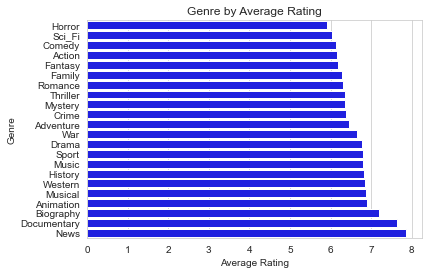

In [126]:
#barplot for average rating by genre
sns.barplot(x = 'averagerating',
            y = 'Movie Genre',
            data = crosstab_genres,
            color = 'Blue')
            

plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Genre by Average Rating')

In [104]:
# querying average rating and runtime minutes

In [105]:
runtime_rating = pd.read_sql("""
SELECT averagerating, runtime_minutes
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
WHERE runtime_minutes <= 200
""", conn)

In [106]:
runtime_rating

,averagerating,runtime_minutes
0,7.0,175.0
1,7.2,114.0
2,6.9,122.0
3,6.5,80.0
4,8.1,83.0
...,...,...
66073,8.4,130.0
66074,6.2,86.0
66075,6.2,75.0
66076,8.7,98.0


In [107]:
runtime_rating['runtime_hours'] = runtime_rating['runtime_minutes'] / 60#dividing runtime by 60 to get total minutes

In [108]:
runtime_rating = runtime_rating.apply(pd.to_numeric, errors = 'coerce')
runtime_rating = runtime_rating.dropna()#dropping an null values

In [109]:
runtime_rating.sort_values('runtime_hours', ascending=False)#sorting runtime ratings by descending 

,averagerating,runtime_minutes,runtime_hours
63626,9.2,200.0,3.333333
46437,2.6,200.0,3.333333
234,9.3,200.0,3.333333
49140,8.1,200.0,3.333333
1079,4.5,200.0,3.333333
...,...,...,...
59742,9.4,4.0,0.066667
51953,4.3,4.0,0.066667
18951,6.2,3.0,0.050000
42874,6.7,3.0,0.050000


Text(0.5, 1.0, 'How long is too long?')

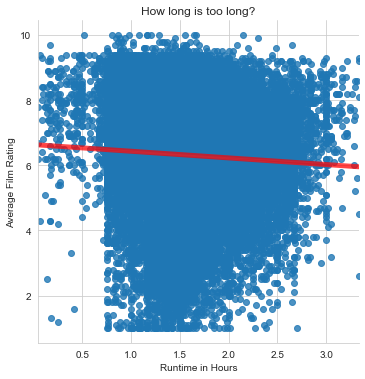

In [110]:
#creating barplot for "how long is too long"
sns.lmplot(data = runtime_rating, x = 'runtime_hours', y = 'averagerating', line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set_style('whitegrid')

plt.ylabel('Average Film Rating')
plt.xlabel('Runtime in Hours')
plt.title('How long is too long?')

In [111]:
#querying top 10 rated directors of top 5 genres

In [171]:
top_news_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'News'
""", conn)

In [172]:
top_news_directors.sort_values(by='averagerating', ascending=False).head(10)

,averagerating,genres,primary_name
1,5.7,News,Raja Sen
0,5.6,News,Ishah Laurah Wright


In [173]:
top_documentary_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'Documentary'
""", conn)

In [174]:
top_documentary_directors.sort_values(by='averagerating', ascending=False)

,averagerating,genres,primary_name
6928,10.0,Documentary,Michael J. Sanderson
86,10.0,Documentary,Ivana Diniz
6395,10.0,Documentary,Lindsay Thompson
6245,10.0,Documentary,Loreto Di Cesare
3288,10.0,Documentary,Mohamed Ulad-Mohand
...,...,...,...
2097,1.0,Documentary,Akihiro Mima
2094,1.0,Documentary,Hiroyuki Nakano
10434,1.0,Documentary,Nadir Dendoune
4666,1.0,Documentary,Ken Carpenter


In [175]:
top_bio_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'Biography'
""", conn)

In [176]:
top_bio_directors.sort_values(by='averagerating', ascending=False).head(10)

,averagerating,genres,primary_name
51,9.5,Biography,Theo Davies
53,9.2,Biography,Rick McLeod
154,9.2,Biography,Péter Lichter
156,9.1,Biography,Leung Pako
155,9.1,Biography,Clifton Ko
146,9.0,Biography,Sameer Vidwans
103,9.0,Biography,Alan Byron
90,8.9,Biography,Clayton Tramel
139,8.9,Biography,Janchivdorj Sengedorj
94,8.9,Biography,Kenya Cagle


In [179]:
top_animation_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'Animation'
""", conn)

In [180]:
top_animation_directors.sort_values(by='averagerating', ascending=False).head(10)

,averagerating,genres,primary_name
282,9.2,Animation,Sumnash Sri Kaljai
2,8.6,Animation,Albert Birney
31,8.6,Animation,Brent Triplett
256,8.4,Animation,Harry Baweja
271,8.3,Animation,Shunsuke Tada
358,8.3,Animation,Sukhwinder Singh Vismaad
42,8.3,Animation,William Winckler
223,8.2,Animation,Lorenzo Berghella
197,8.2,Animation,Andrew Duncan
191,8.2,Animation,Karma Dhendup


In [181]:
top_musical_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'Musical'
""", conn)

In [182]:
top_musical_directors.sort_values(by='averagerating', ascending=False).head(10)

,averagerating,genres,primary_name
130,9.3,Musical,Lorenzo Thione
129,9.3,Musical,Matt Hoffman
1,9.1,Musical,Ross MacGibbon
29,9.1,Musical,Barry Bliss
91,9.1,Musical,Corey Lubowich
114,9.0,Musical,Chris Dockrill
94,8.9,Musical,Lorenzo Thione
112,8.9,Musical,Anna
40,8.6,Musical,Anton Vassil
82,8.6,Musical,Ross MacGibbon


In [183]:
#inserting tn_movie_budgets_df into SQL db

In [184]:
pd.read_sql_query("SELECT * from sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,movie_budgets,movie_budgets,41369,"CREATE TABLE movie_budgets(\n ""id"" TEXT,\n ""..."
9,table,tmdb_movies,tmdb_movies,41574,"CREATE TABLE tmdb_movies(\n """" TEXT,\n ""genr..."


In [185]:
import subprocess
subprocess.run(["sqlite3", "im.db", ".mode csv", ".import UnzippedData/tn.movie_budgets.csv movie_budgets"], capture_output=True)

CompletedProcess(args=['sqlite3', 'im.db', '.mode csv', '.import UnzippedData/tn.movie_budgets.csv movie_budgets'], returncode=0, stdout=b'', stderr=b'')

In [186]:
#importing tmdb.movies into SQl

In [187]:
import subprocess
subprocess.run(["sqlite3", "im.db", ".mode csv", ".import UnzippedData/tmdb.movies.csv tmdb_movies"], capture_output=True)

CompletedProcess(args=['sqlite3', 'im.db', '.mode csv', '.import UnzippedData/tmdb.movies.csv tmdb_movies'], returncode=0, stdout=b'', stderr=b'')

In [188]:
gross_vs_averate = pd.read_sql("""
SELECT DISTINCT movie, title, vote_average, worldwide_gross
FROM movie_budgets
INNER JOIN tmdb_movies
    ON movie_budgets.movie = tmdb_movies.title
""", conn)
#query for movie, title, voteaverage, worldwide gross from tmbd movies and movie_budgets

In [189]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].str.replace('$', '')#removing $

In [190]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].str.replace(',', '')#removing commas

In [191]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].astype('int64')#setting worldwide gross as int

In [192]:
gross_vs_averate['vote_average'] = gross_vs_averate['vote_average'].astype('float')#setting vote average as float

In [193]:
gross_vs_averate.drop(gross_vs_averate[gross_vs_averate['worldwide_gross'] == 0].index, inplace=True)#dropping unused column

In [194]:
gross_vs_averate

,movie,title,vote_average,worldwide_gross
0,Avatar,Avatar,7.4,2776345279
1,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,6.4,1045663875
2,Avengers: Age of Ultron,Avengers: Age of Ultron,7.3,1403013963
3,Avengers: Infinity War,Avengers: Infinity War,8.3,2048134200
4,Justice League,Justice League,6.2,655945209
...,...,...,...,...
2190,Krisha,Krisha,6.8,144822
2191,Krisha,Krisha,9.0,144822
2192,Emily,Emily,7.0,3547
2193,Exeter,Exeter,4.7,489792


Text(0.5, 1.0, 'Average Rating vs Total Gross')

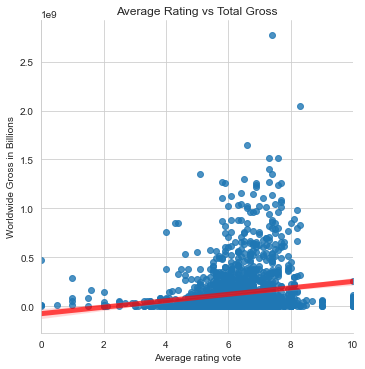

In [195]:
sns.lmplot(x = 'vote_average',
           y = 'worldwide_gross',
           data = gross_vs_averate,
           line_kws={"color":"r","alpha":0.7,"lw":5})


plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))
plt.xlabel('Average rating vote')
plt.ylabel('Worldwide Gross in Billions')
plt.title('Average Rating vs Total Gross')

#plotting worldwide gross vs average rating